In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
data= pd.read_csv("C:/Users/HP/Data Analytics Real-World Projects in Python/IPL data Analysis/matches.csv")

In [3]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [5]:
data.drop(columns ='umpire3', axis =1, inplace =True)
data.shape

(636, 17)

In [6]:
Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS',
    'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL',
    'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD',
    'Chennai Super Kings':'CSK',
    'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC',
    'Kochi Tuskers Kerala':'KTK',
    'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
}

In [7]:
data['team1']= data['team1'].map(Teams)
data['team2']= data['team2'].map(Teams)

In [8]:
data['winner']= data['winner'].map(Teams)

In [9]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,Royal Challengers Bangalore,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,MI,RPS,Rising Pune Supergiant,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,GL,KKR,Kolkata Knight Riders,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,RPS,KXIP,Kings XI Punjab,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,RCB,DD,Royal Challengers Bangalore,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [10]:
win_df = data.groupby('season')['winner'].value_counts()
win_df

season  winner
2008    RR        13
        KXIP      10
        CSK        9
        DD         7
        MI         7
                  ..
2017    SRH        8
        KXIP       7
        DD         6
        GL         4
        RCB        3
Name: winner, Length: 84, dtype: int64

In [11]:
print('Various cities matches played at : ', data['city'].unique())

Various cities matches played at :  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]


In [12]:
print('Various venues matches played at : ',data['venue'].unique())

Various venues matches played at :  ['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 '

In [13]:
print('Teams : ',data['team1'].unique())

Teams :  ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


In [14]:
player_match_df = data.groupby(['season'])['player_of_match'].value_counts()

In [15]:
player_match_df

season  player_of_match  
2008    SE Marsh             5
        SR Watson            4
        YK Pathan            4
        AC Gilchrist         2
        M Ntini              2
                            ..
2017    SS Iyer              1
        SV Samson            1
        WP Saha              1
        Washington Sundar    1
        Yuvraj Singh         1
Name: player_of_match, Length: 435, dtype: int64

#### Player with maximum Mans of the Matches

In [16]:
data['player_of_match'].value_counts().nlargest(5)

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
Name: player_of_match, dtype: int64

#### Maximum win by runs

In [17]:
data[data['win_by_runs'] ==data['win_by_runs'].max()]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,5/6/2017,MI,DD,Delhi Daredevils,field,normal,0,MI,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


#### Maximum win by wickets

In [18]:
data[data['win_by_wickets'] ==data['win_by_wickets'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,4/7/2017,GL,KKR,Kolkata Knight Riders,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,4/30/2017,DD,KXIP,Kings XI Punjab,field,normal,0,KXIP,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,4/27/2008,MI,DC,Deccan Chargers,field,normal,0,DC,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,4/19/2009,KXIP,DD,Delhi Daredevils,field,normal,1,DD,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,3/18/2010,RR,RCB,Royal Challengers Bangalore,field,normal,0,RCB,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,5/20/2011,MI,RR,Mumbai Indians,bat,normal,0,RR,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,5/20/2012,RR,MI,Rajasthan Royals,bat,normal,0,MI,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,4/10/2013,KXIP,CSK,Chennai Super Kings,field,normal,0,CSK,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,4/26/2015,DD,RCB,Royal Challengers Bangalore,field,normal,0,RCB,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,4/21/2016,GL,SRH,Sunrisers Hyderabad,field,normal,0,SRH,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


#### Toss Decisions across Seasons

In [19]:
data.groupby(['season'])['toss_decision'].value_counts()

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
Name: toss_decision, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

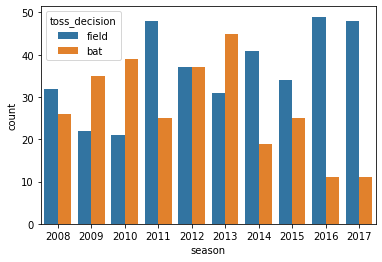

In [20]:
sb.countplot(x = 'season', hue = 'toss_decision' ,data = data)

#### Maximum Toss Winners

<AxesSubplot:>

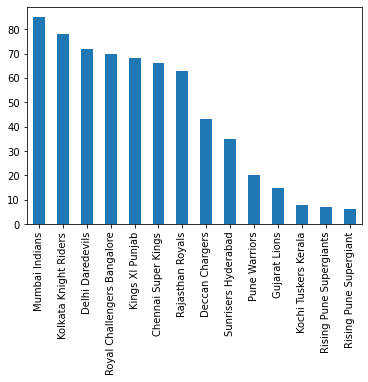

In [21]:
data['toss_winner'].value_counts().plot.bar()

#### Total Matches vs Wins for Teams

In [22]:
df1 = pd.DataFrame(data['team1'].value_counts())
df2 = pd.DataFrame(data['team2'].value_counts())

In [23]:
df3 =df1.merge(df2, how = 'inner', left_index = True, right_index = True )

In [24]:
df3['Total_matches'] =df3['team1'] + df3['team2']

In [25]:
df4 = pd.DataFrame(data['winner'].value_counts())

In [26]:
df3 =df3.merge(df4, how = 'inner', left_index = True, right_index = True )

In [27]:
df3['win_pc'] = df3['winner']/df3['Total_matches']*100

In [28]:
df3.reset_index(inplace= True)

In [29]:
df3.rename(columns={'index' : 'Team'},inplace =True)


In [30]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [31]:
trace1 = go.Bar(
    x=df3['Team'],
    y=df3['Total_matches'],
    name='Total matches'
)
trace2 = go.Bar(
    x=df3.Team,
    y=df3['winner'],
    name='Matches Won'
)


In [32]:
dataset = [trace1, trace2]
py.iplot(dataset)

In [33]:
df3.head()

,Team,team1,team2,Total_matches,winner,win_pc
0,MI,82,75,157,92,58.598726
1,KXIP,77,71,148,70,47.297297
2,CSK,77,54,131,79,60.305344
3,RCB,70,82,152,73,48.026316
4,KKR,68,80,148,77,52.027027


#### Matches played across each season

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



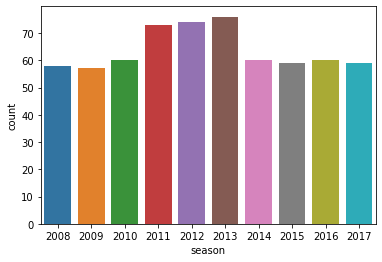

In [34]:
sb.countplot(data['season']);

#### Runs Across the Seasons

In [35]:
data2 = pd.read_csv('C:/Users/HP/Data Analytics Real-World Projects in Python/4-IPL data Analysis-20210703T075452Z-001/4-IPL data Analysis/deliveries.csv')

In [36]:
data2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [37]:
df_5 = pd.DataFrame(data2[['match_id' ,'total_runs']])


In [38]:
df_5.groupby(['match_id'])['total_runs'].sum()

match_id
1      379
2      371
3      367
4      327
5      299
      ... 
632    277
633    317
634    302
635    325
636    408
Name: total_runs, Length: 636, dtype: int64

In [39]:
df_6 = pd.DataFrame(data[['season','id']])


In [40]:
df_6.rename(columns={'id' : 'match_id'},inplace =True)

In [122]:
df_merge = df_6.merge(df_5, how = 'inner', on = 'match_id' )

In [123]:
df_merge


,season,match_id,total_runs
0,2017,1,0
1,2017,1,0
2,2017,1,4
3,2017,1,0
4,2017,1,2
...,...,...,...
150455,2016,636,2
150456,2016,636,0
150457,2016,636,1
150458,2016,636,1


In [100]:
season = df_merge.groupby(['season'])['total_runs'].sum().reset_index()

In [101]:
season

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


<AxesSubplot:xlabel='season'>

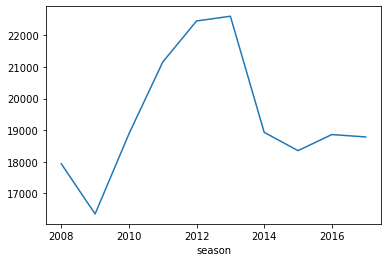

In [76]:
 df_merge.groupby(['season'])['total_runs'].sum().plot.line()

#### Average runs per Match

In [165]:
avg_runs=data.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})
avg_runs

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [166]:
final=pd.concat([avg_runs,season.iloc[:,1]],axis=1)
final

,season,matches,total_runs
0,2008,58,17937
1,2009,57,16353
2,2010,60,18883
3,2011,73,21154
4,2012,74,22453
5,2013,76,22602
6,2014,60,18931
7,2015,59,18353
8,2016,60,18862
9,2017,59,18786


In [167]:
final['per_match_runs']=final['total_runs']/final['matches']
final.set_index('season',inplace=True)

In [168]:
final

,matches,total_runs,per_match_runs
season,,,
2008,58,17937,309.258621
2009,57,16353,286.894737
2010,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


<AxesSubplot:xlabel='season'>

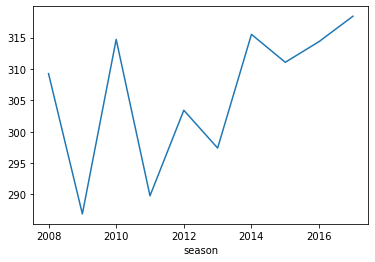

In [169]:
final['per_match_runs'].plot()

In [172]:
def lucky(data,team):
    return data[data['winner']==team]['venue'].value_counts().nlargest(5)

<AxesSubplot:>

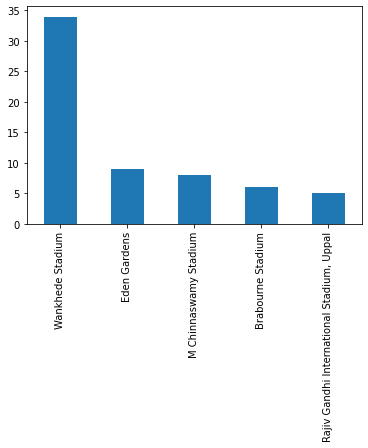

In [175]:
lucky(data,'MI').plot.bar()

#### Comment Wankhede stadium is llucky for Mumbai Indians

In [188]:
def comparision(team1,team2):
    compare =data[( (data['team1'] ==team1) | (data['team2'] ==team1) )&( (data['team1'] ==team2) | (data['team2'] ==team2) )]
    sb.countplot(x= 'season', hue ='winner', data = compare)

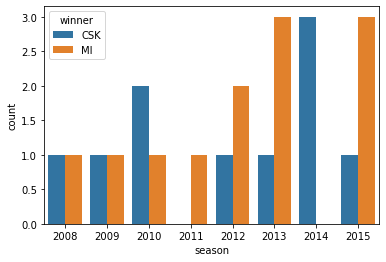

In [189]:
comparision('MI','CSK')